In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii 

## Analysis of pulse through high-pass circuit

In [41]:
#import data
from astropy.io import ascii 

data=ascii.read("Lab4Data.csv")
time=data.columns[0]
time=np.array([time])[0]

input=data.columns[1]  #output signal
input=np.array([input])[0]

output=data.columns[2] #input signal
output=np.array([output])[0]

The following plot shows voltage versus time when a pulse of amplitude 1 V is sent through a high pass filter. Both the input pulse and the output are plotted.

<IPython.core.display.Javascript object>


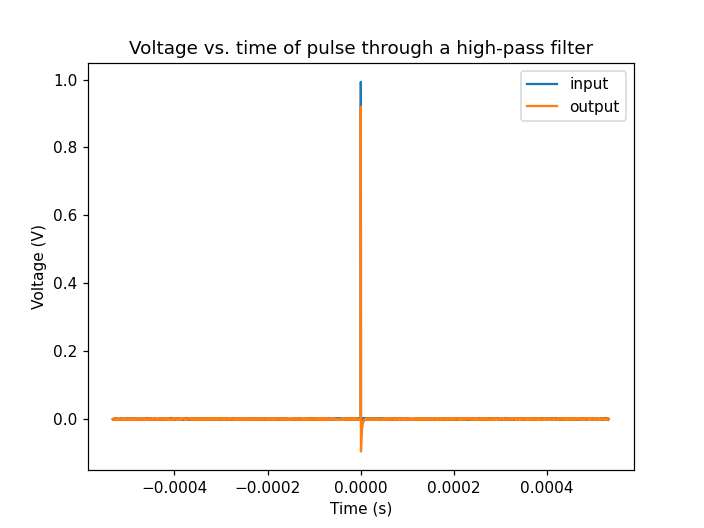

Text(0, 0.5, 'Voltage (V)')

In [73]:
plt.close()
plt.plot(time,input,label='input')
plt.plot(time,output,label='output')
plt.legend()
plt.title('Voltage vs. time of pulse through a high-pass filter')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')

#result matches waveforms and seems to be what is expected

We now perform a fourier transofrm on both our output and input signals. We plot both the real and imaginary parts of these transforms versus frequency.

<IPython.core.display.Javascript object>


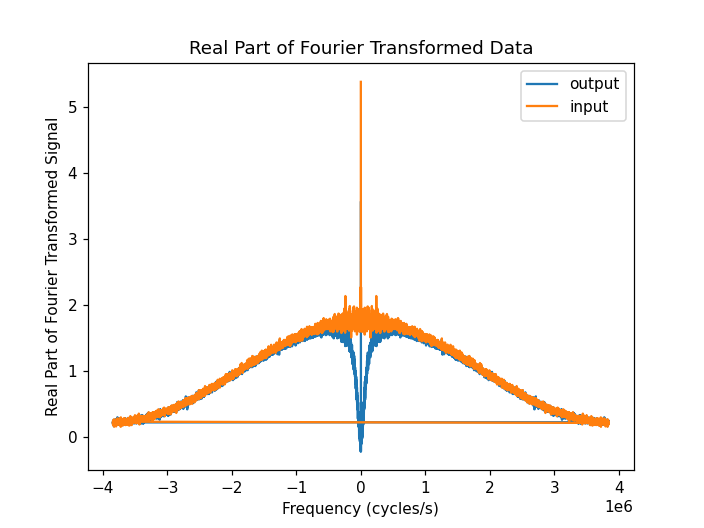

Text(0.5, 1.0, 'Real Part of Fourier Transformed Data')

In [60]:
plt.close()
transformoutput=np.fft.fft(np.fft.fftshift(output))
transforminput=np.fft.fft(np.fft.fftshift(input))
deltatime=(np.max(time)-np.min(time))/(len(time)-1)
plt.plot(np.fft.fftfreq(len(time),deltatime),np.real(transformoutput),label='output')
plt.plot(np.fft.fftfreq(len(time),deltatime),np.real(transforminput),label='input')
plt.legend()
plt.xlabel('Frequency (cycles/s)')
plt.ylabel('Real Part of Fourier Transformed Signal')
plt.title('Real Part of Fourier Transformed Data')

<IPython.core.display.Javascript object>


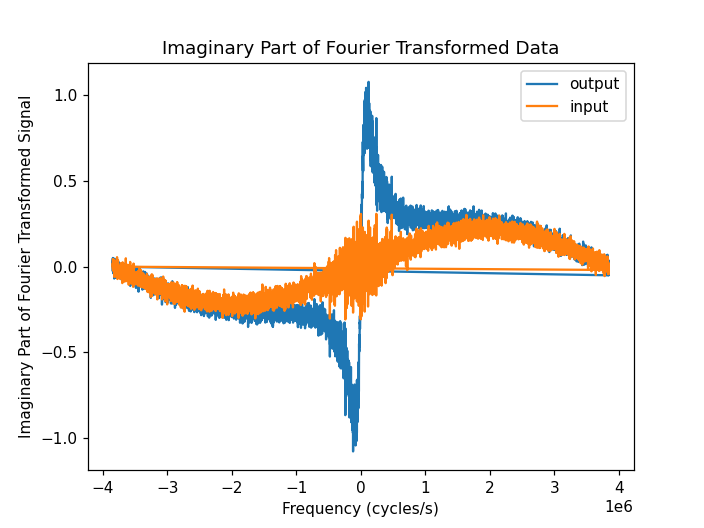

Text(0.5, 1.0, 'Imaginary Part of Fourier Transformed Data')

In [61]:
plt.close()
transformoutput=np.fft.fft(np.fft.fftshift(output))
transforminput=np.fft.fft(np.fft.fftshift(input))
deltatime=(np.max(time)-np.min(time))/(len(time)-1)
plt.plot(np.fft.fftfreq(len(time),deltatime),np.imag(transformoutput),label='output')
plt.plot(np.fft.fftfreq(len(time),deltatime),np.imag(transforminput),label='input')
plt.legend()
plt.xlabel('Frequency (cycles/s)')
plt.ylabel('Imaginary Part of Fourier Transformed Signal')
plt.title('Imaginary Part of Fourier Transformed Data')

Now, to check that our results are in agreement with theory, we plot the expected $|V_{out}/V_{in}|$ and expected phase of $V_{out}/V_{in}$ versus frequency alongside our data.

<IPython.core.display.Javascript object>


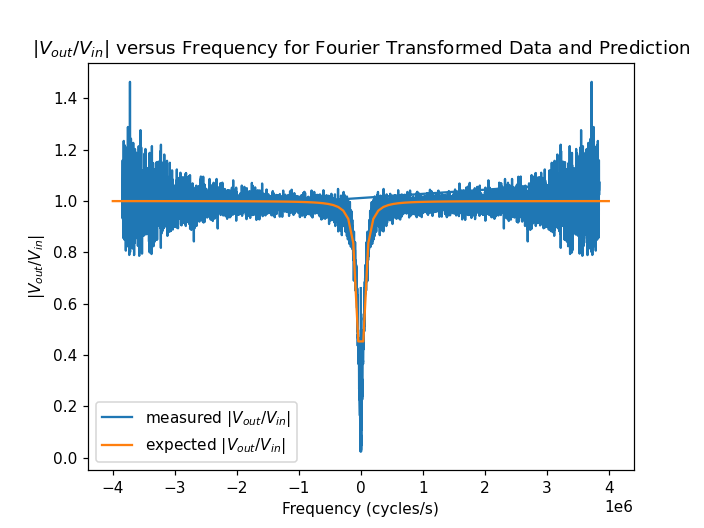

Text(0.5, 1.0, '$|V_{out}/V_{in}|$ versus Frequency for Fourier Transformed Data and Prediction')

In [74]:
plt.close()
plt.plot(np.fft.fftfreq(len(time),deltatime),np.abs(transformoutput)/np.abs(transforminput),label='measured $|V_{out}/V_{in}|$')

R=200
C=10**(-8)
freqarray = np.linspace(-4*10**6, 4*10**6, 100)
plt.plot(freqarray,np.sqrt(R**2/(R**2+1/(2*np.pi*freqarray)**2/C**2)),label='expected $|V_{out}/V_{in}|$')
plt.legend()
plt.xlabel('Frequency (cycles/s)')
plt.ylabel('$|V_{out}/V_{in}|$')
plt.title('$|V_{out}/V_{in}|$ versus Frequency for Fourier Transformed Data and Prediction')

<IPython.core.display.Javascript object>


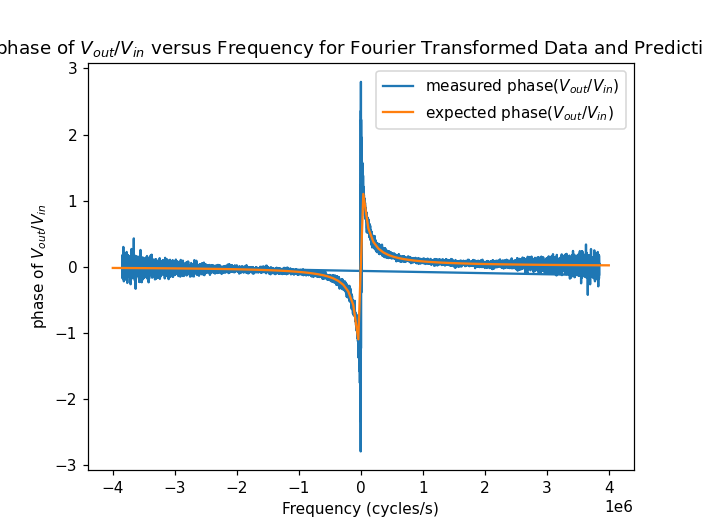

Text(0.5, 1.0, 'phase of $V_{out}/V_{in}$ versus Frequency for Fourier Transformed Data and Prediction')

In [75]:
plt.close()
plt.plot(np.fft.fftfreq(len(time),deltatime),np.angle(transformoutput/transforminput),label='measured phase$(V_{out}/V_{in})$')

R=200
C=10**(-8)
freqarray = np.linspace(-4*10**6, 4*10**6, 100)
plt.plot(freqarray,np.angle(R/(R+1/(1j*2*np.pi*freqarray*C))),label='expected phase$(V_{out}/V_{in})$')
plt.legend()
plt.xlabel('Frequency (cycles/s)')
plt.ylabel('phase of $V_{out}/V_{in}$')
plt.title('phase of $V_{out}/V_{in}$ versus Frequency for Fourier Transformed Data and Prediction')